## Titanic Survival Prediction

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("tested.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Data Preprocessing

#### Checking Null values

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Checking no. of columns and rows

In [4]:
df.shape

(418, 12)

In [5]:
print(f"This DataSet Contains {df.shape[0]} rows & {df.shape[1]} columns")

This DataSet Contains 418 rows & 12 columns


#### Describing the Dataset

In [6]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,418.0,NaN,NaN,NaN,1100.5,120.810458,892.0,996.25,1100.5,1204.75,1309.0
Survived,418.0,NaN,NaN,NaN,0.363636,0.481622,0.0,0.0,0.0,1.0,1.0
Pclass,418.0,NaN,NaN,NaN,2.26555,0.841838,1.0,1.0,3.0,3.0,3.0
Name,418,418,"Kelly, Mr. James",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,418,2,male,266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,332.0,NaN,NaN,NaN,30.27259,14.181209,0.17,21.0,27.0,39.0,76.0
SibSp,418.0,NaN,NaN,NaN,0.447368,0.89676,0.0,0.0,0.0,1.0,8.0
Parch,418.0,NaN,NaN,NaN,0.392344,0.981429,0.0,0.0,0.0,0.0,9.0
Ticket,418,363,PC 17608,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,417.0,NaN,NaN,NaN,35.627188,55.907576,0.0,7.8958,14.4542,31.5,512.3292


### Data Cleaning

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

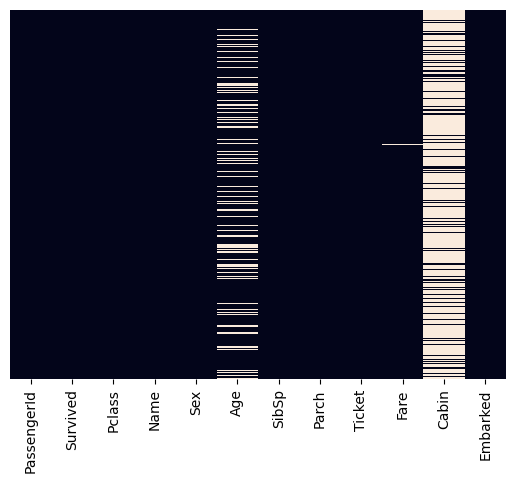

In [8]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False)

In [9]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [10]:
df['Fare'].fillna(df['Fare'].median(), inplace=True)

In [11]:
df.drop("Cabin", axis = 1, inplace = True)

#### After Cleaning the Data

<AxesSubplot:>

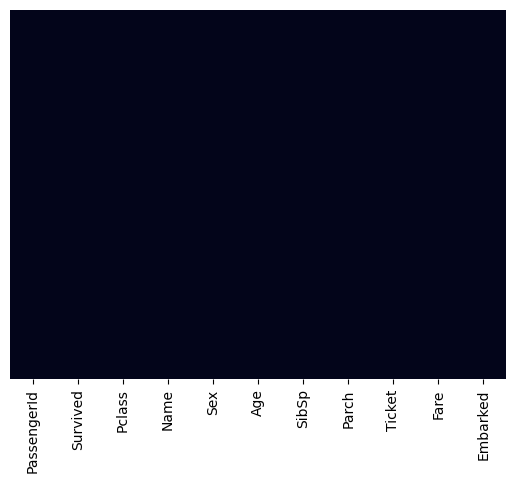

In [12]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [14]:
df1 = df

In [15]:
df1.drop("Name", axis = 1, inplace = True)

In [16]:
df1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,male,34.5,0,0,330911,7.8292,Q
1,893,1,3,female,47.0,1,0,363272,7.0000,S
2,894,0,2,male,62.0,0,0,240276,9.6875,Q
3,895,0,3,male,27.0,0,0,315154,8.6625,S
4,896,1,3,female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,27.0,0,0,A.5. 3236,8.0500,S
414,1306,1,1,female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,male,27.0,0,0,359309,8.0500,S


### Data Analyzes

<AxesSubplot:xlabel='Survived', ylabel='count'>

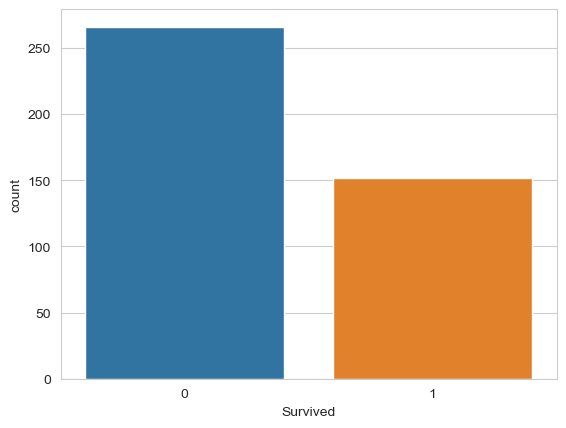

In [17]:
sns.set_style("whitegrid")
sns.countplot(data = df1, x = "Survived")

<AxesSubplot:xlabel='Survived', ylabel='count'>

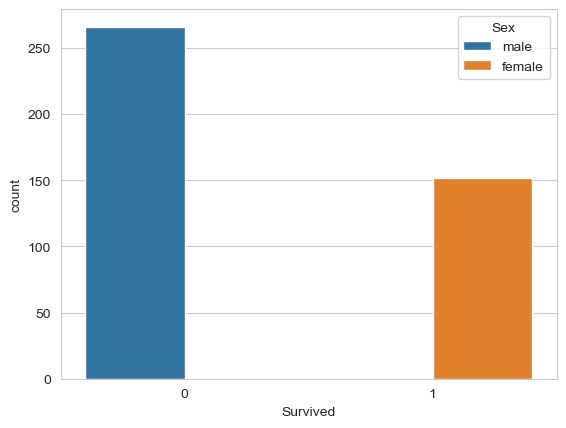

In [18]:
sns.set_style("whitegrid")
sns.countplot(data = df1, x = "Survived", hue="Sex")

<AxesSubplot:xlabel='Survived', ylabel='count'>

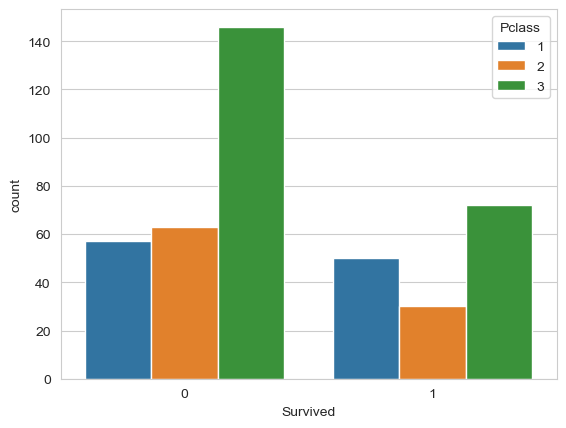

In [19]:
sns.countplot(data = df1, x = "Survived", hue="Pclass")

## Handling outliers

C:\Users\91885\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


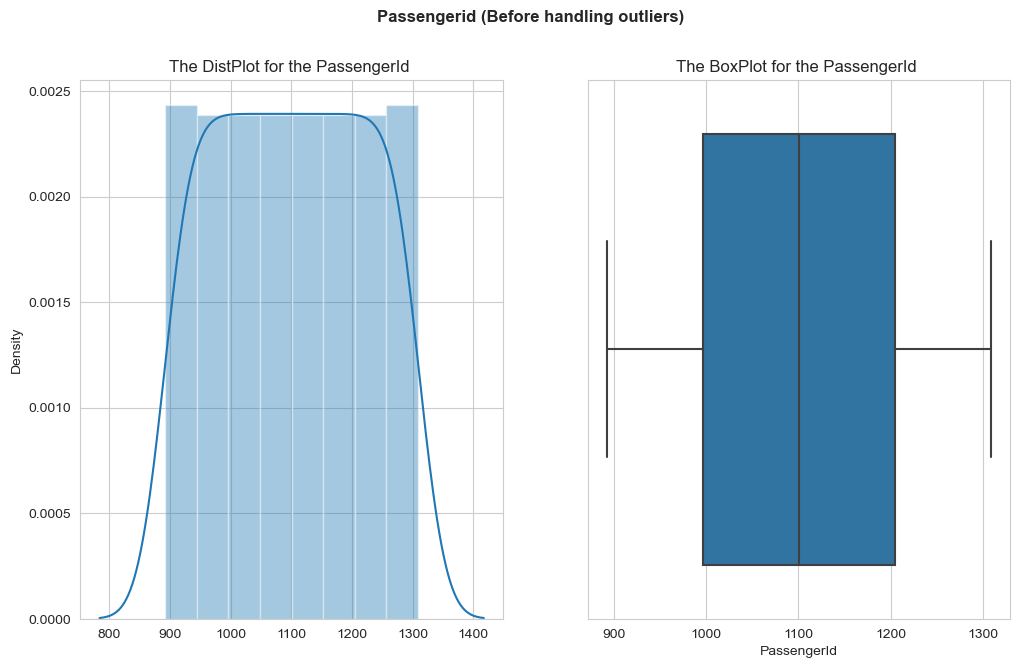

C:\Users\91885\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


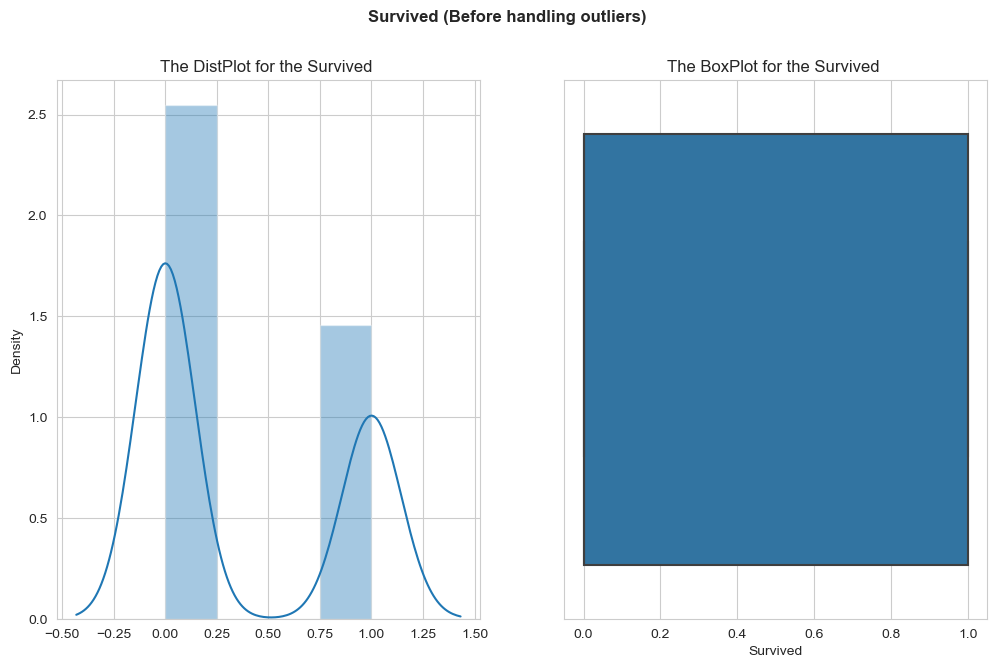

C:\Users\91885\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


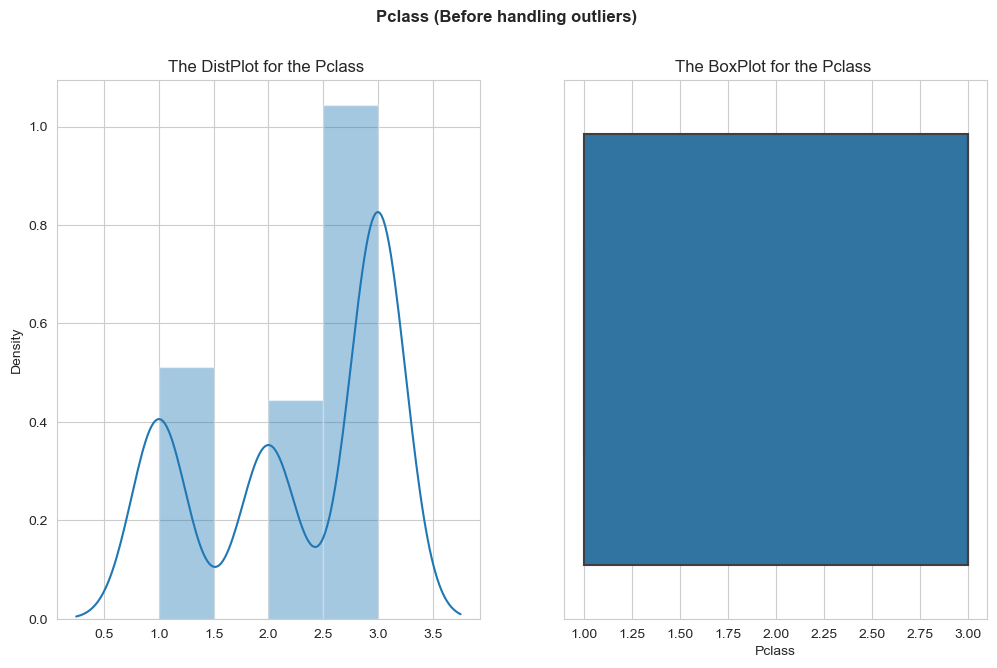

C:\Users\91885\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


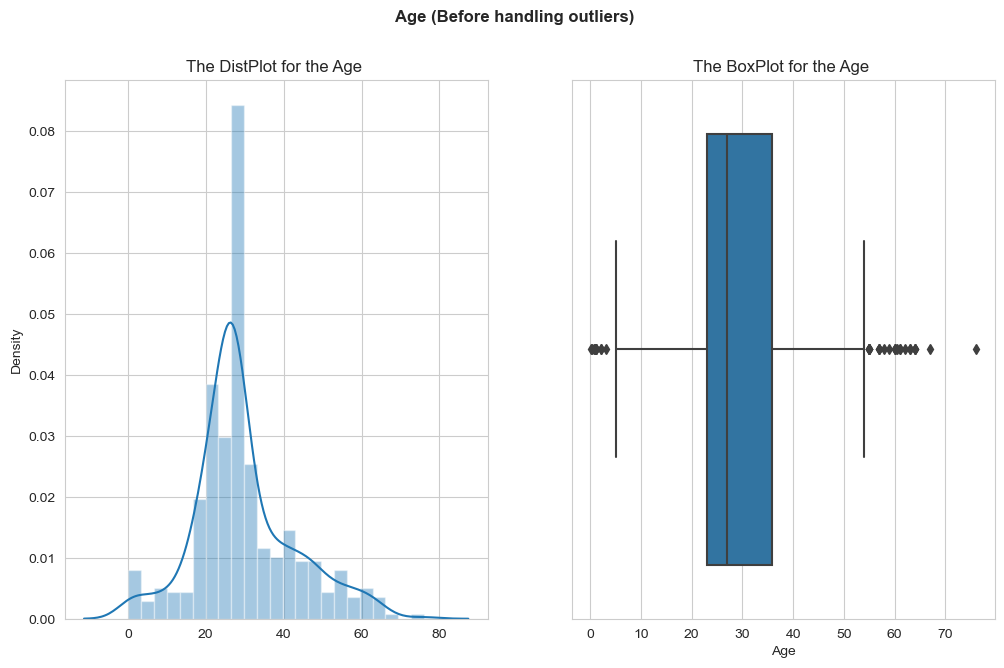

C:\Users\91885\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


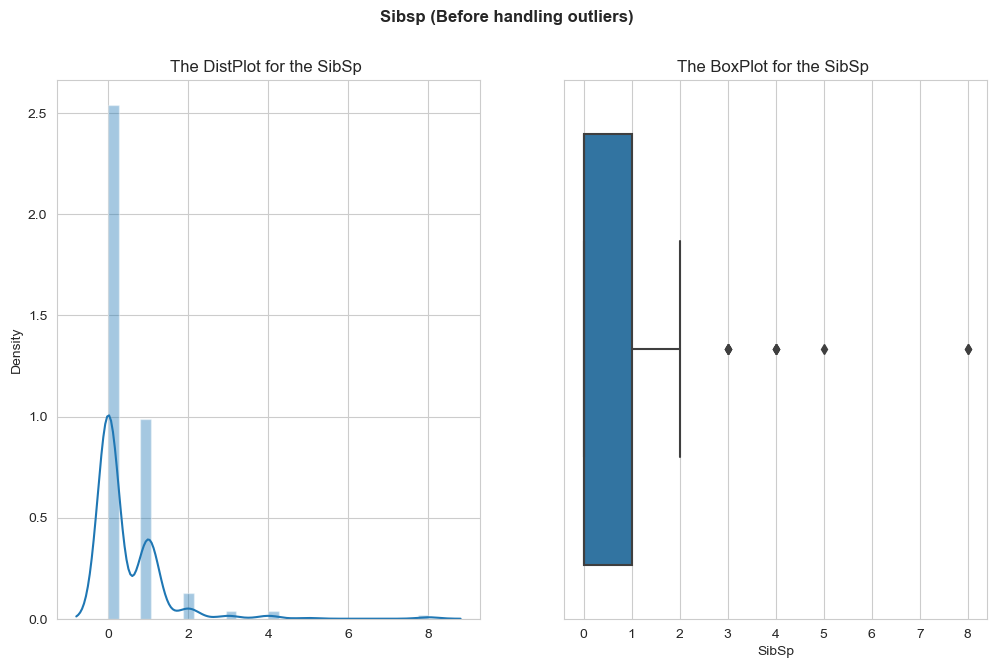

C:\Users\91885\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


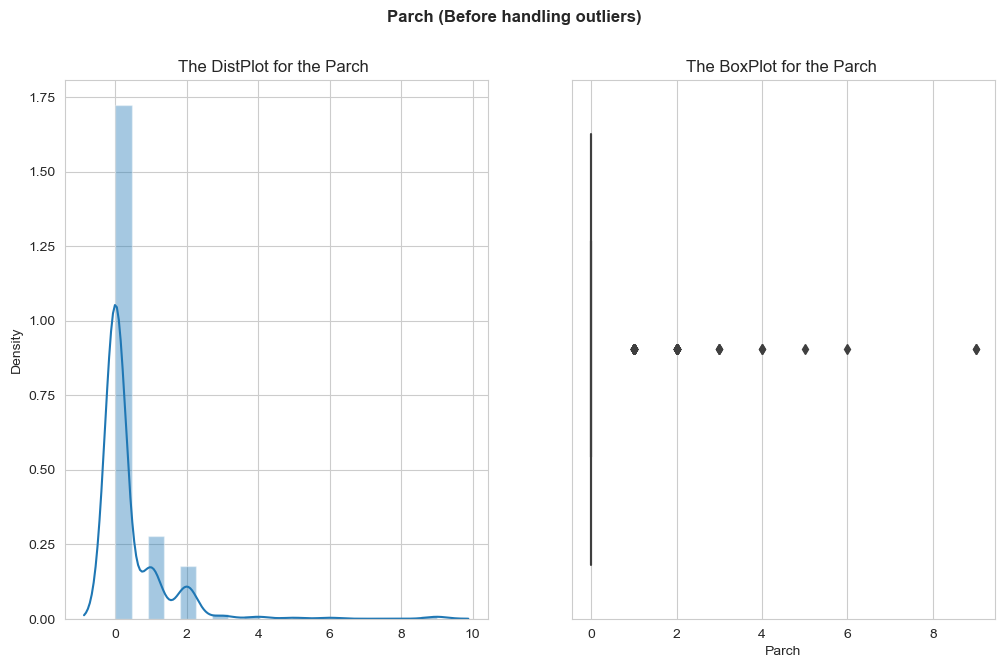

C:\Users\91885\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


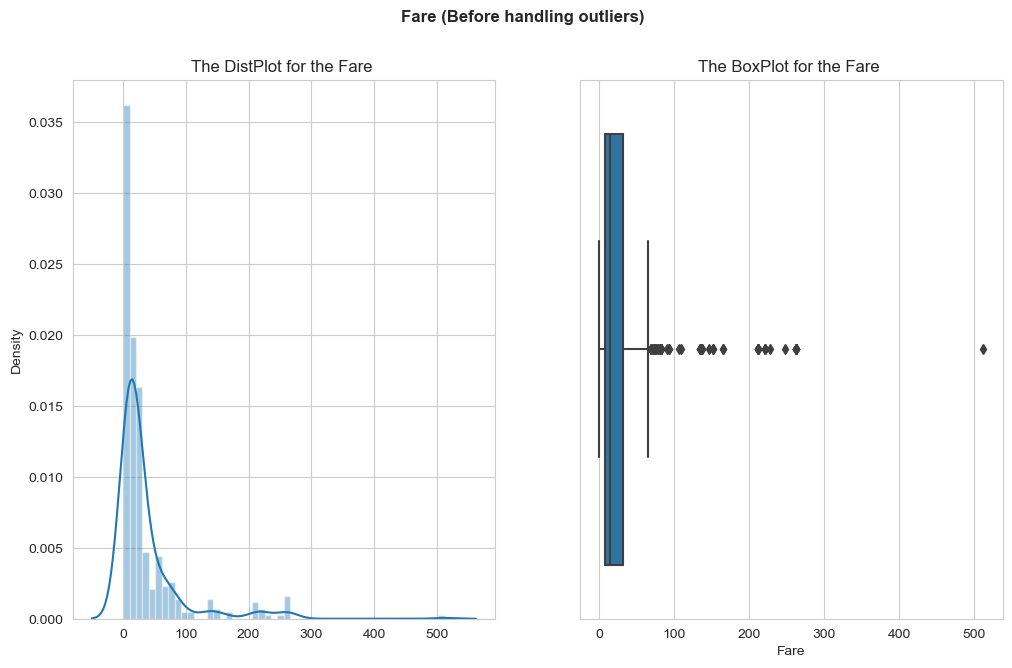

In [20]:
for col in df1.select_dtypes(exclude = "object" ):
    plt.figure(figsize=(12,7))
    plt.subplot(1,2,1)
    sns.distplot(x = df1[col]);
    plt.title(f'The DistPlot for the {col} ')
    plt.subplot(1,2,2)
    sns.boxplot(x = df1[col]);
    plt.title(f'The BoxPlot for the {col} ')
    plt.suptitle(f'{col.title()} (Before handling outliers)',weight='bold')
    plt.show()

In [21]:
def outlier_handle(data):
    df1_copy = df1.copy()
    for col_name in data.select_dtypes(exclude="object"):
        q1 = data[col_name].quantile(0.25)
        q3 = data[col_name].quantile(0.75)
        iqr = q3-q1  #IQR
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        df1_copy.loc[:,  col_name] = np.where(data[col_name]> fence_high, fence_high,
                                         np.where(data[col_name]< fence_low, fence_low,
                                                  data[col_name]))
    return df1_copy
df1 = outlier_handle(df1)

C:\Users\91885\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


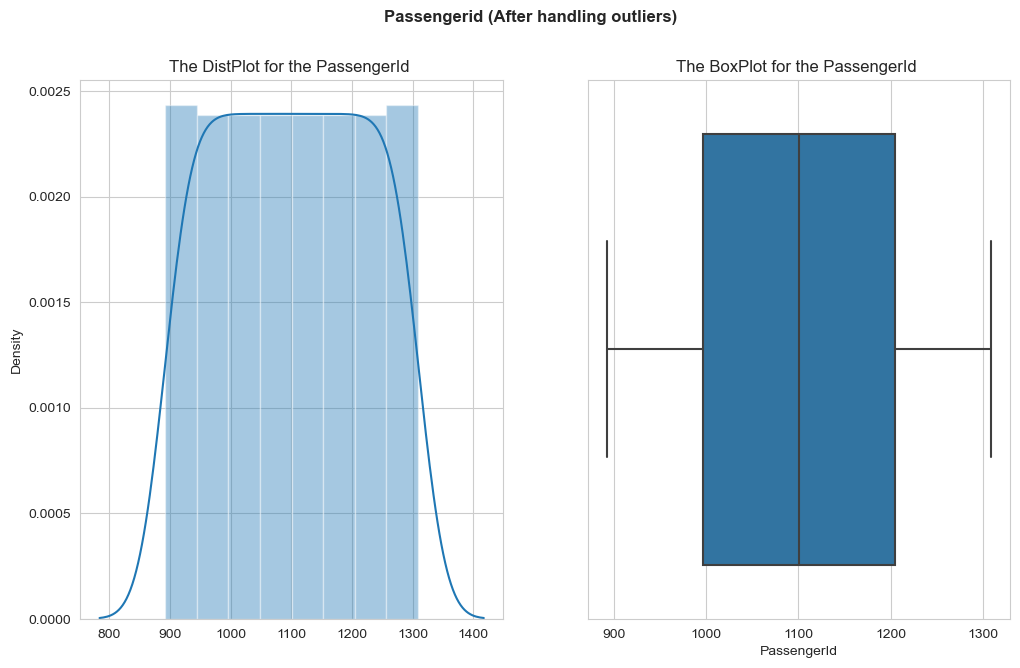

C:\Users\91885\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


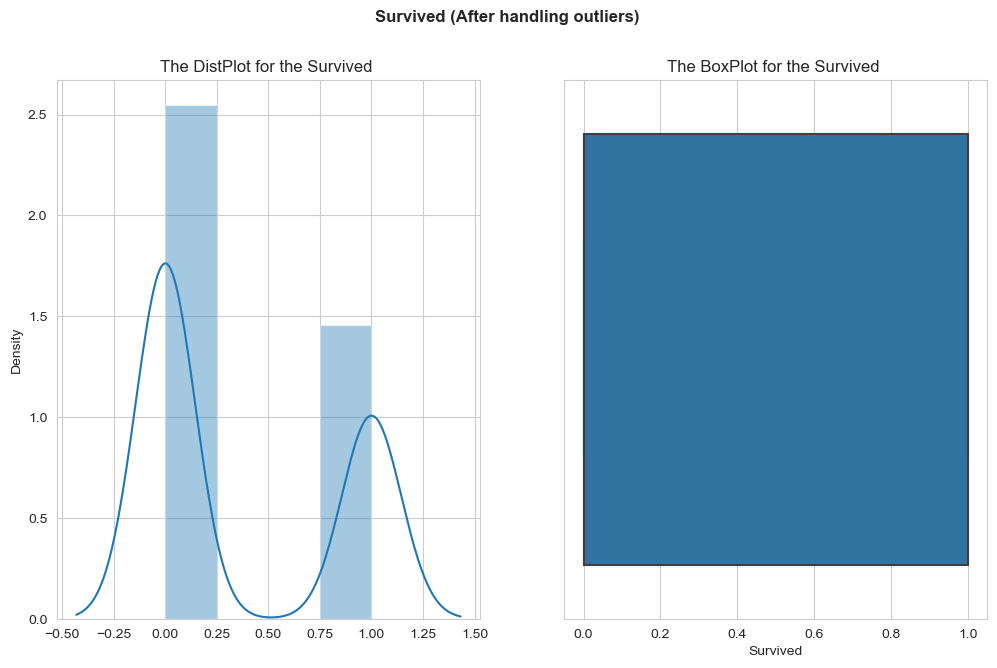

C:\Users\91885\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


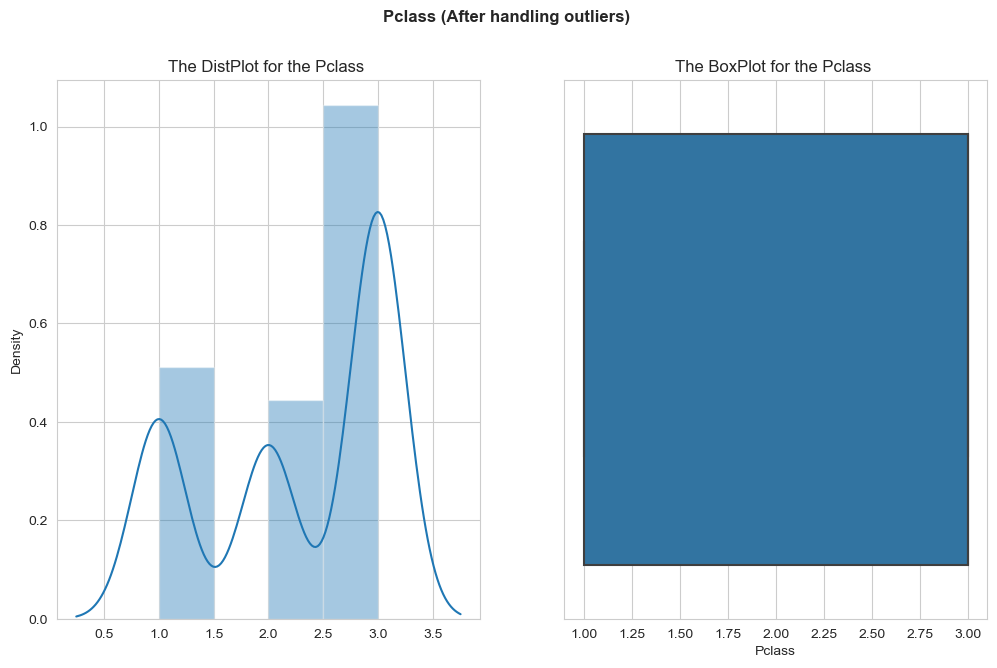

C:\Users\91885\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


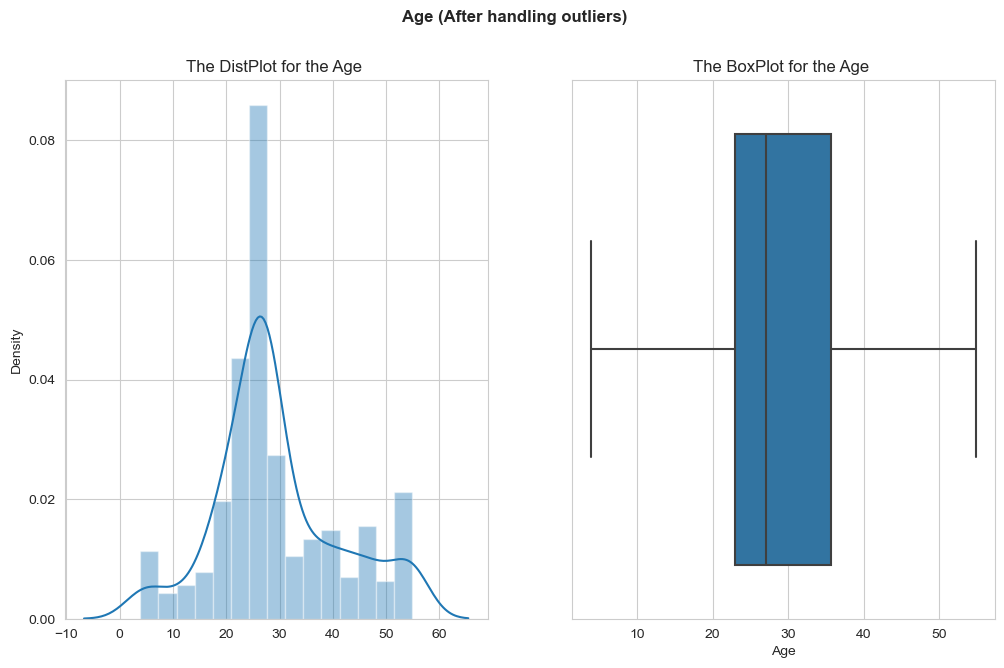

C:\Users\91885\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


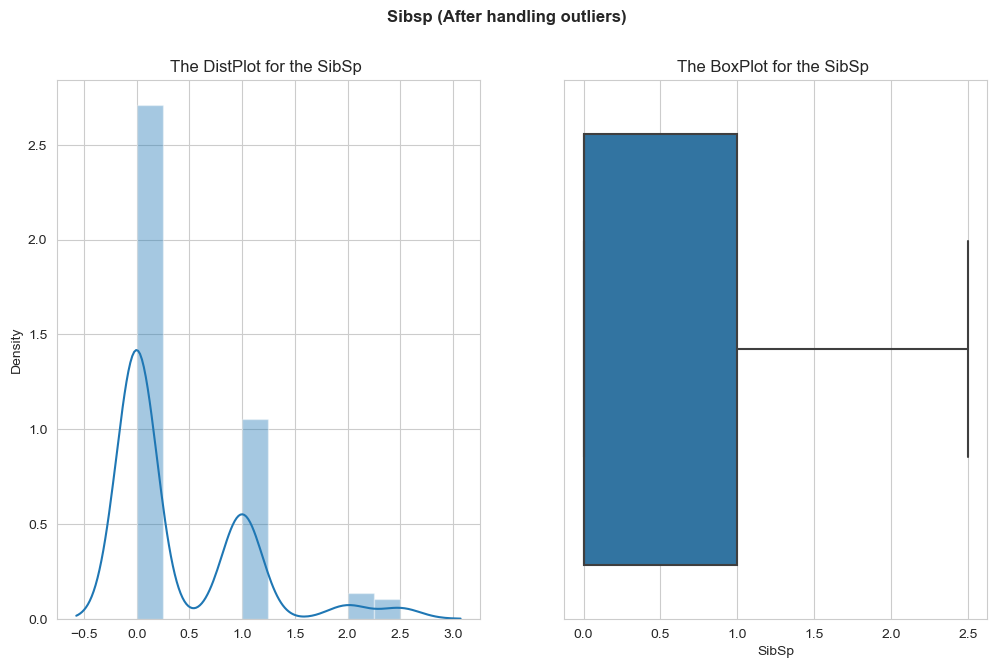

C:\Users\91885\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91885\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


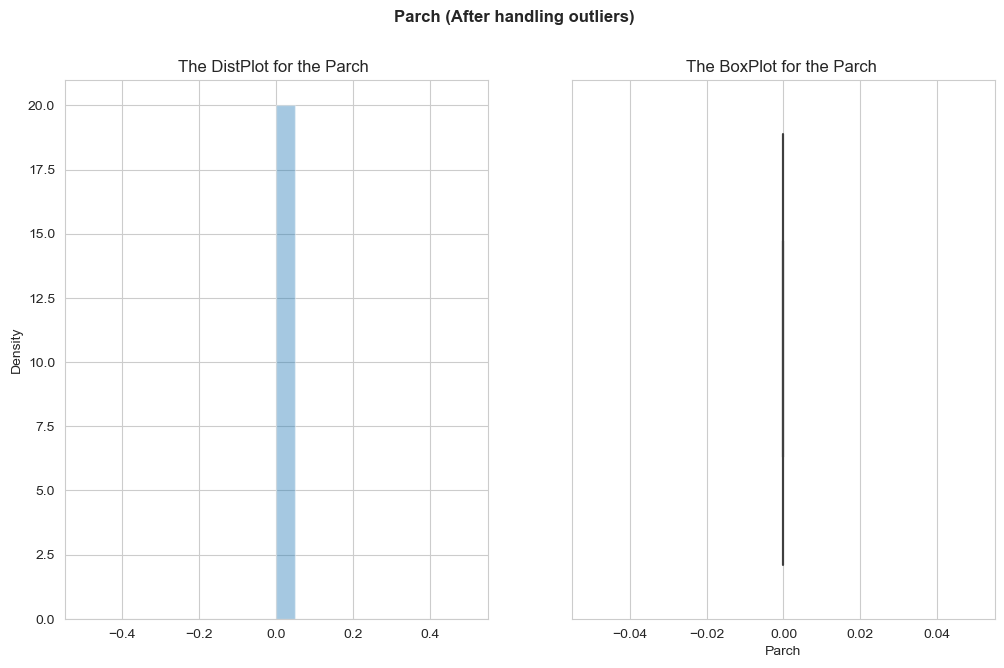

C:\Users\91885\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


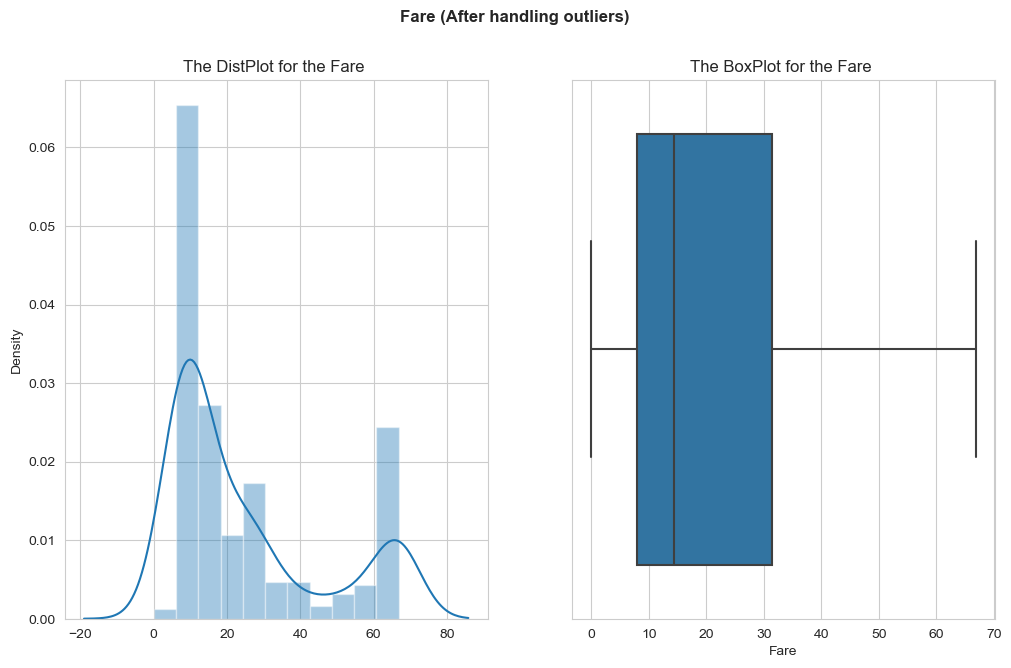

In [22]:
for col in df1.select_dtypes(exclude = "object" ):
    plt.figure(figsize=(12,7))
    plt.subplot(1,2,1)
    sns.distplot(x = df1[col]);
    plt.title(f'The DistPlot for the {col} ')
    plt.subplot(1,2,2)
    sns.boxplot(x = df1[col]);
    plt.title(f'The BoxPlot for the {col} ')
    plt.suptitle(f'{col.title()} (After handling outliers)',weight='bold')
    plt.show()

<Figure size 1500x1500 with 0 Axes>

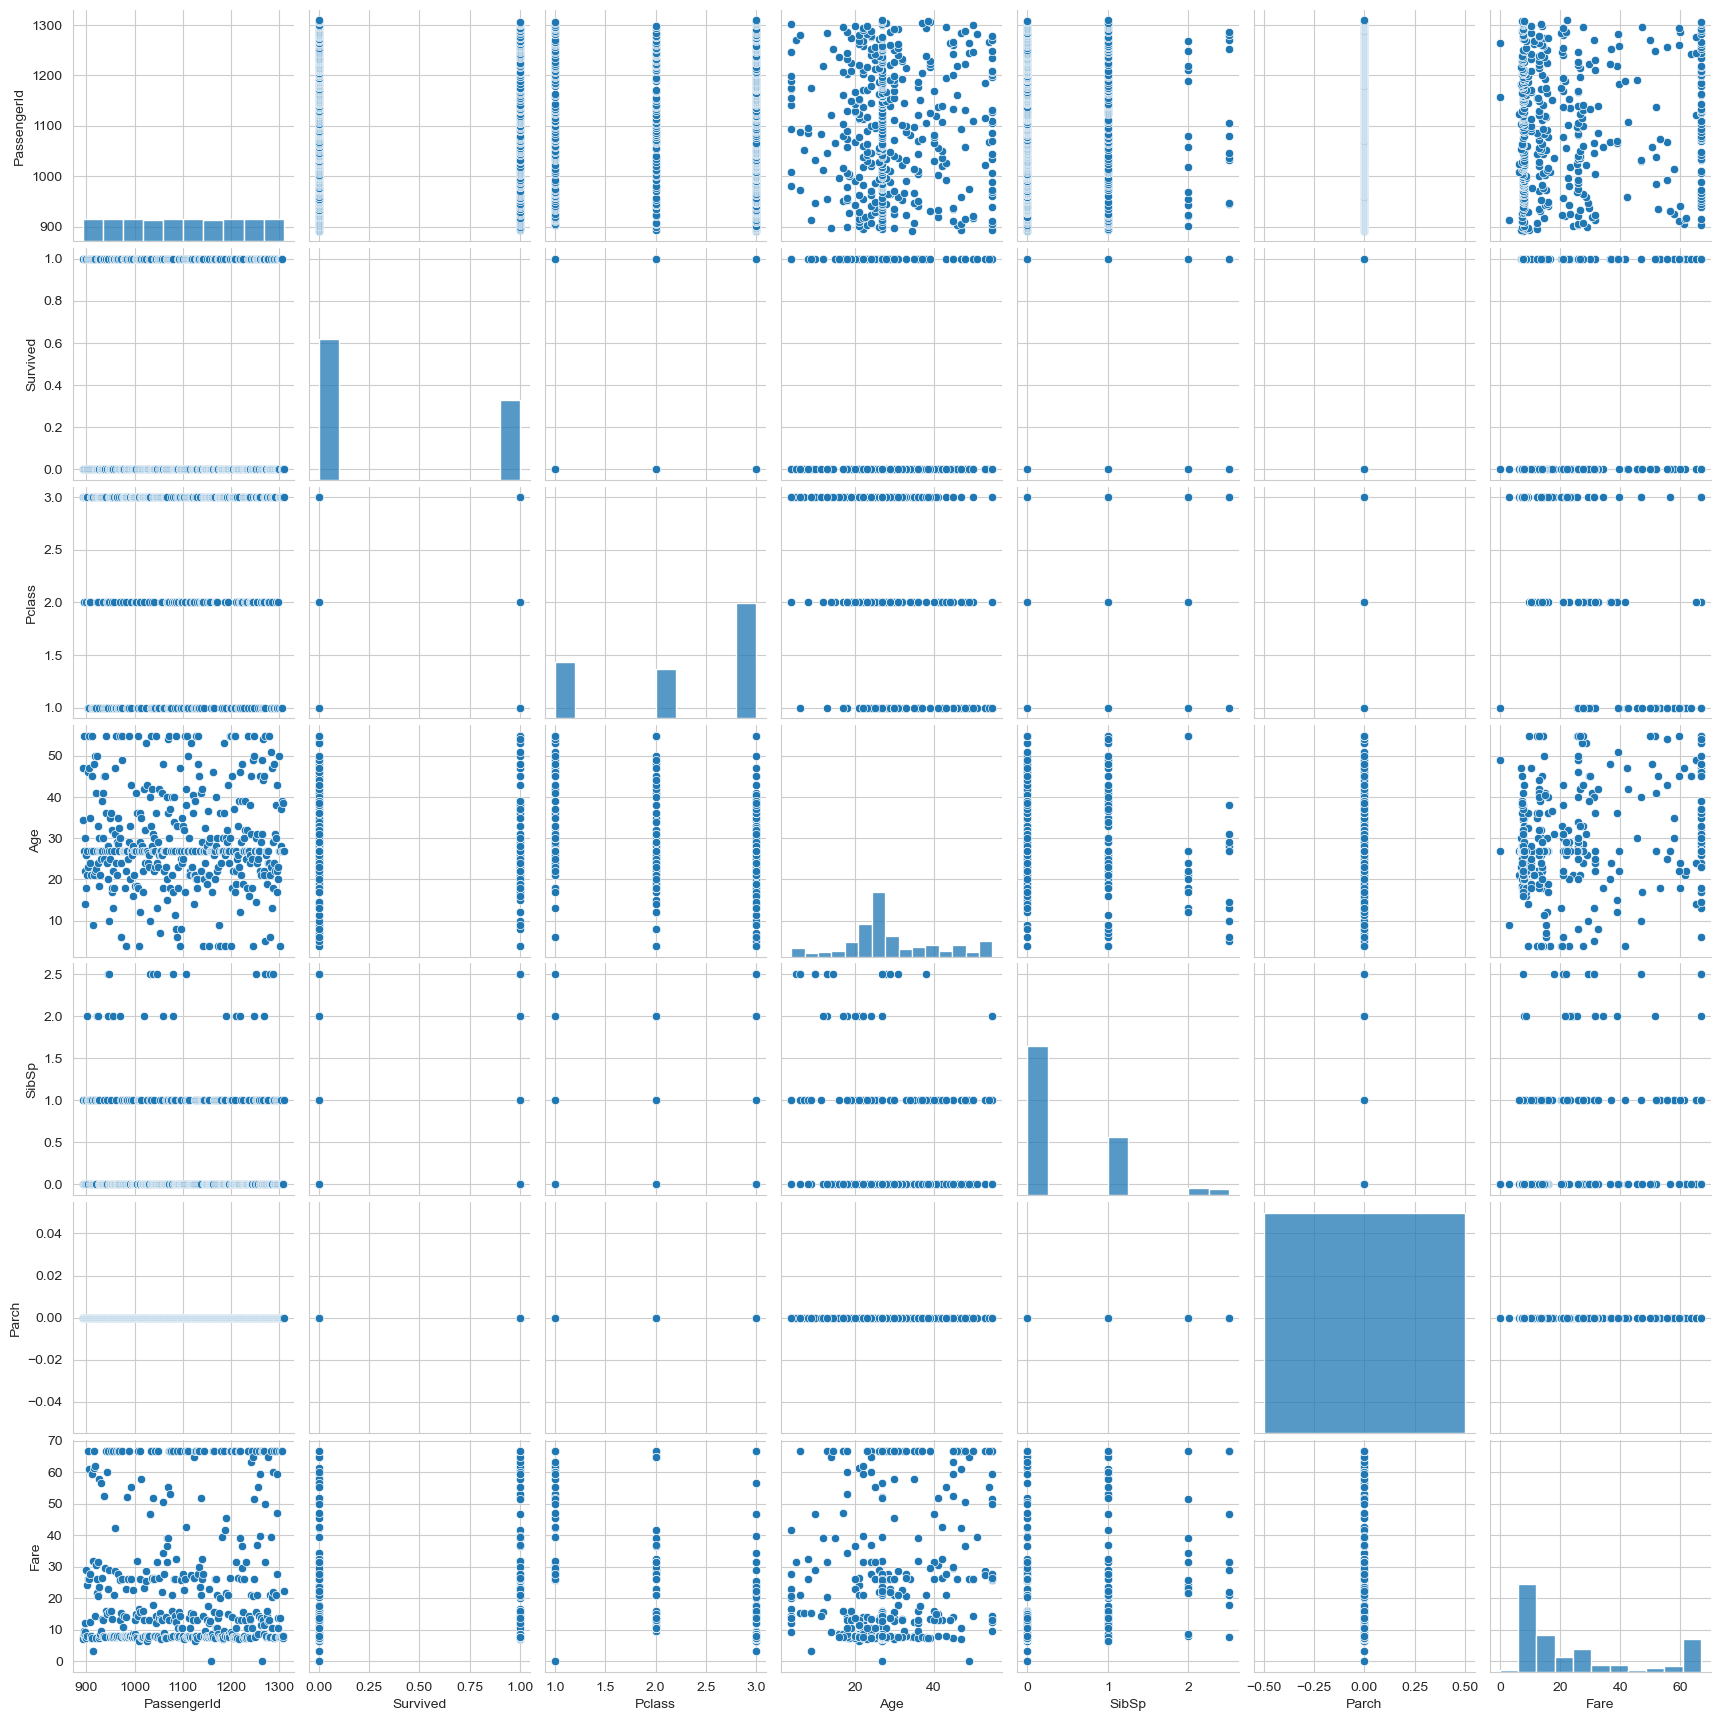

In [23]:
plt.figure(figsize=(15,15))
sns.pairplot(df1)
plt.show()

## Encoding

In [24]:
new_df = df1

In [25]:
from sklearn.preprocessing import LabelEncoder
sex_le = LabelEncoder()

In [26]:
new_df['Sex'] = sex_le.fit_transform(new_df['Sex'])

In [27]:
Survived_le = LabelEncoder()
new_df['Survived'] = Survived_le.fit_transform(new_df['Survived'])

In [28]:
Pclass_le = LabelEncoder()
new_df['Pclass'] = Pclass_le.fit_transform(new_df['Pclass'])

In [29]:
Age_le = LabelEncoder()
new_df['Age'] = Age_le.fit_transform(new_df['Age'])

In [30]:
Sib_le = LabelEncoder()
new_df['SibSp'] = Sib_le.fit_transform(new_df['SibSp'])

In [31]:
new_df.drop(["PassengerId", "Ticket", "Embarked","Parch"], axis = 1, inplace = True)

In [32]:
new_df

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,2,1,37,0,7.829200
1,1,2,0,53,1,7.000000
2,0,1,1,60,0,9.687500
3,0,2,1,27,0,8.662500
4,1,2,0,20,1,12.287500
...,...,...,...,...,...,...
413,0,2,1,27,0,8.050000
414,1,0,0,44,0,66.835988
415,0,2,1,43,0,7.250000
416,0,2,1,27,0,8.050000


## Data Modeling

### Logistic Regression Model

In [33]:
new_df

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,2,1,37,0,7.829200
1,1,2,0,53,1,7.000000
2,0,1,1,60,0,9.687500
3,0,2,1,27,0,8.662500
4,1,2,0,20,1,12.287500
...,...,...,...,...,...,...
413,0,2,1,27,0,8.050000
414,1,0,0,44,0,66.835988
415,0,2,1,43,0,7.250000
416,0,2,1,27,0,8.050000


In [34]:
X = new_df.iloc[:,1:]
Y = new_df['Survived']

In [35]:
X 

,Pclass,Sex,Age,SibSp,Fare
0,2,1,37,0,7.829200
1,2,0,53,1,7.000000
2,1,1,60,0,9.687500
3,2,1,27,0,8.662500
4,2,0,20,1,12.287500
...,...,...,...,...,...
413,2,1,27,0,8.050000
414,0,0,44,0,66.835988
415,2,1,43,0,7.250000
416,2,1,27,0,8.050000


In [36]:
Y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,Y , test_size= 0.25 ,random_state=50)

In [38]:
print("x_train =", x_train.shape)
print("x_test =", x_test.shape)
print()
print("y_train =", y_train.shape)
print("y_test =", y_test.shape)

x_train = (313, 5)
x_test = (105, 5)

y_train = (313,)
y_test = (105,)


In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test)

In [42]:
from sklearn.linear_model import LogisticRegression
logistic_regressor = LogisticRegression()
logistic_regressor.fit(x_train, y_train)

LogisticRegression()

In [45]:
y_pred = logistic_regressor.predict(x_test)
lr = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
lr

,y_test,y_pred
151,0,0
271,0,0
89,0,0
407,0,0
115,0,0
...,...,...
50,0,0
24,1,1
146,0,0
184,1,1


In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
confusion_matrix(y_test,y_pred)

array([[68,  0],
       [ 0, 37]], dtype=int64)

In [48]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

In [49]:
tn, fp, fn, tp

(68, 0, 0, 37)

<AxesSubplot:>

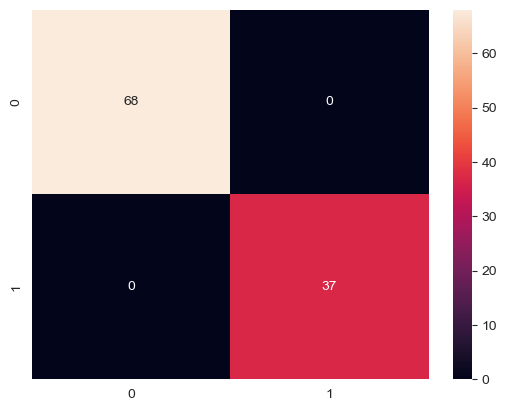

In [50]:
sns.heatmap(confusion_matrix(y_test,y_pred),fmt='d', annot=True)

#### Evaluation

In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        37

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



### Result

The machine learning model, based on logistic regression, was trained and evaluated on the dataset. The following metrics were obtained on the test data:

• Precision: 100% for both class 0 and class 1.

• Recall: 100% for both class 0 and class 1.

• F1-Score: 100% for both class 0 and class 1.

• Accuracy: 100%.

These exceptional results suggest that the model performed exceptionally well on the given dataset, achieving perfect precision, recall, and F1-scores for both classes and a 100% overall accuracy. While these results are promising, it's essential to conduct further evaluation and validation on new, unseen data to ensure that the model generalizes effectively.